In [2]:
import yfinance as yf
import matplotlib.pyplot as plt
from datetime import datetime
import numpy as np
from arch import arch_model
plt.rcParams.update({'font.size': 20})


def arch_data(x, p, vol="ARCH"):
    garch = arch_model(x, p=p, vol=vol)  # construction du modele
    garch_fit = garch.fit()  # calibrage du modele
    return garch_fit


# ticker1 = "^FCHI"  # CAC40

ticker1 = "ETH-USD"

data = yf.download(ticker1,
                   start=datetime(2003, 1, 1),
                   end=datetime(2023, 1, 1))

data["Returns"] = 100 * (data["Close"].pct_change())
x = data["Returns"].dropna()

garch = arch_data(x, 1)
garch1 = garch.conditional_volatility

garch = arch_data(x, 2)
garch2 = garch.conditional_volatility

garch = arch_data(x, 20)
garch3 = garch.conditional_volatility


[*********************100%***********************]  1 of 1 completed
Iteration:      1,   Func. Count:      5,   Neg. LLF: 5804.212772610609
Iteration:      2,   Func. Count:     11,   Neg. LLF: 5688.672649677236
Iteration:      3,   Func. Count:     16,   Neg. LLF: 6097.325136594627
Iteration:      4,   Func. Count:     22,   Neg. LLF: 5688.53587200032
Iteration:      5,   Func. Count:     26,   Neg. LLF: 5688.535862889047
Iteration:      6,   Func. Count:     29,   Neg. LLF: 5688.535862889032
Optimization terminated successfully    (Exit mode 0)
            Current function value: 5688.535862889047
            Iterations: 6
            Function evaluations: 29
            Gradient evaluations: 6
Iteration:      1,   Func. Count:      6,   Neg. LLF: 5905.684937714532
Iteration:      2,   Func. Count:     13,   Neg. LLF: 5829.630032799538
Iteration:      3,   Func. Count:     20,   Neg. LLF: 5692.384020984162
Iteration:      4,   Func. Count:     26,   Neg. LLF: 5681.958586708741
Itera

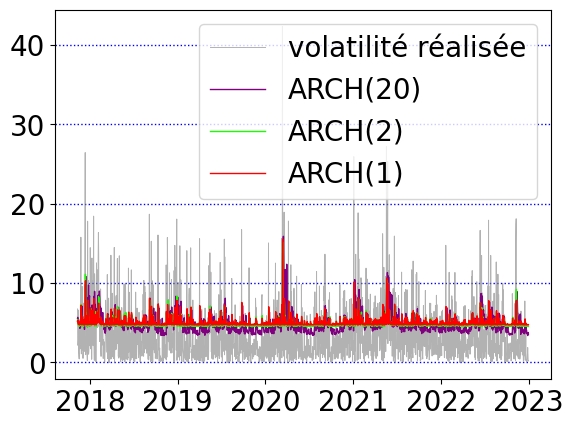

In [3]:
plt.plot(np.abs(x), linewidth=0.7,
         color="grey", alpha=0.6,
         label="volatilité réalisée")
plt.plot(garch3, linewidth=1,
         color="purple",
         alpha=1,
         label="ARCH(20)")
plt.plot(garch2, linewidth=1,
         color="#1BFE00",
         alpha=1,
         label="ARCH(2)")
plt.plot(garch1, linewidth=1,
         color="red",
         alpha=1,
         label="ARCH(1)")
plt.grid(axis='y', linestyle='dotted', color="blue", lw=1)
plt.legend()
plt.show()

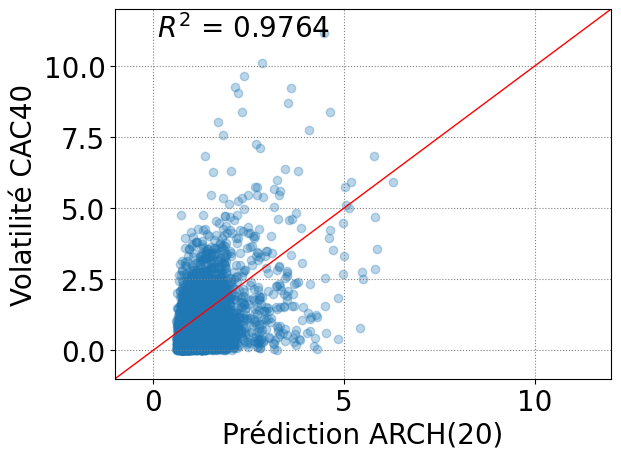

In [69]:
from sklearn.metrics import r2_score
r2 = r2_score(x, garch3)
plt.scatter(garch3, np.abs(
    x), alpha=0.3)
plt.axline((0, 0), (1, 1), linewidth=1, color='r')
plt.xlabel("Prédiction ARCH(20)")
plt.ylabel("Volatilité CAC40")
plt.xlim((-1,12))
plt.ylim((-1,12))
plt.grid(linestyle='dotted', color='grey')
plt.text(0.1,11,f"$R^2$ = {round(np.abs(r2),4)}")
plt.show()


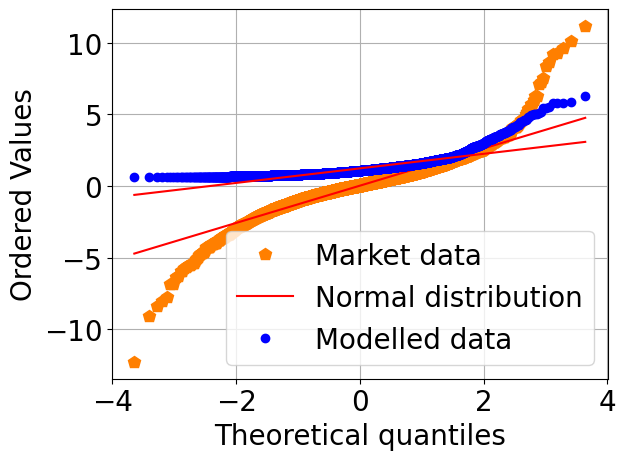

In [70]:
from scipy import stats

fig = plt.figure()
ax = fig.add_subplot(111)
res = stats.probplot(x, plot=plt)
res = stats.probplot(garch3, plot=plt)
ax.set_title("")
ax.grid()
ax.get_lines()[0].set_marker('p')
ax.get_lines()[0].set_color('#ff7f00')
ax.get_lines()[0].set_markersize(9)
ax.legend(['Market data','Normal distribution','Modelled data'])


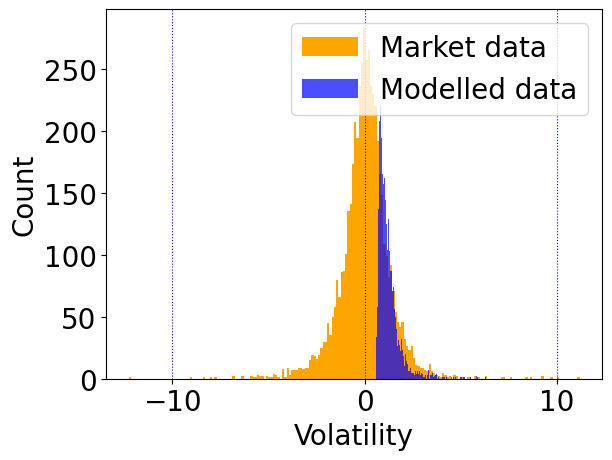

In [71]:
n, bins, patches = plt.hist(x ,bins=200);
for c, p in zip(bins, patches):
    plt.setp(p, 'facecolor', 'orange')

n, bins, patches = plt.hist(garch3,bins=200, alpha=0.7);
for c, p in zip(bins, patches):
    plt.setp(p, 'facecolor', 'blue')
    
plt.grid(axis='x', color='blue', linestyle='dotted')
plt.xlabel("Volatility")
plt.ylabel('Count')
# plt.ylim((0,500))
plt.legend(['Market data','Modelled data'])

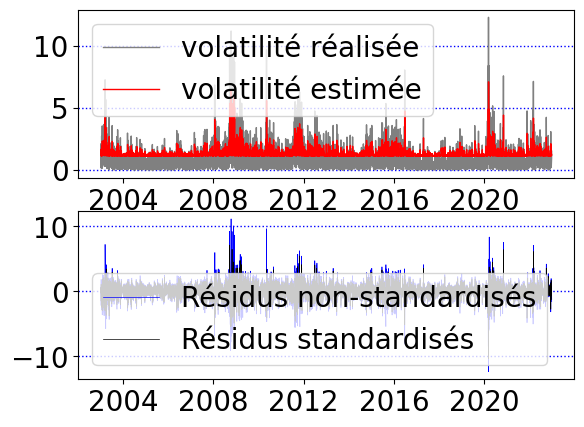

In [74]:
import seaborn as sns
import scipy.stats as stats

plt.subplot(211)
plt.plot(np.abs(x), linewidth=1, color='grey', label='volatilité réalisée')
plt.plot(garch1, linewidth=1, color='red', label='volatilité estimée')
plt.grid(axis='y', linestyle='dotted', color="blue", lw=1)
plt.legend()

plt.subplot(212)
res = garch.resid
standardized_res = res/garch1
plt.plot(res, color='blue', alpha=1, linewidth=0.5,
         label="Résidus non-standardisés")
plt.plot(standardized_res, linewidth=0.5, color="black", label="Résidus standardisés")
plt.grid(axis='y', linestyle='dotted', color="blue", lw=1)
plt.legend()


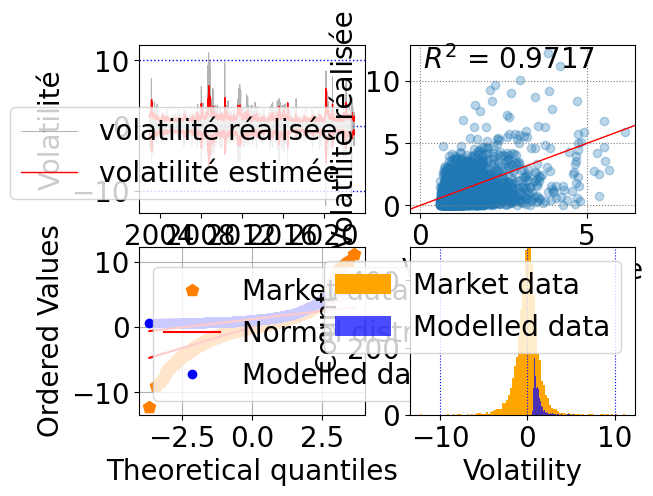

In [18]:
from scipy import stats
from sklearn.metrics import r2_score

fig = plt.figure()
ax = fig.add_subplot(221)
# plt.subplot(221)
plt.plot(x, linewidth=0.7,
         color="grey", alpha=0.6,
         label="volatilité réalisée")
plt.plot(garch1, linewidth=1,
         color="red",
         label="volatilité estimée")
plt.plot(- garch1, linewidth=1, color="red")
plt.grid(axis='y', linestyle='dotted', color="blue", lw=1)
plt.xlabel("Année")
plt.ylabel("Volatilité")
plt.legend()

ax = fig.add_subplot(222)
# plt.subplot(222)
r2 = r2_score(x, garch1)
plt.scatter(garch1, np.abs(
    x), alpha=0.3)
plt.axline((0, 0), (1, 1), linewidth=1, color='r')
plt.xlabel("Volatilité estimée")
plt.ylabel("Volatilité réalisée")
plt.grid(linestyle='dotted', color='grey')
plt.text(0.1, 11, f"$R^2$ = {round(np.abs(r2),4)}")

ax = fig.add_subplot(223)
# plt.subplot(223)
res = stats.probplot(x, plot=plt)
res = stats.probplot(garch1, plot=plt)
ax.set_title("")
ax.grid()
ax.get_lines()[0].set_marker('p')
ax.get_lines()[0].set_color('#ff7f00')
ax.get_lines()[0].set_markersize(9)
plt.legend(['Market data', 'Normal distribution', 'Modelled data'])

ax = fig.add_subplot(224)
# plt.subplot(224)
n, bins, patches = plt.hist((data["Returns"]), bins=100)
for c, p in zip(bins, patches):
    plt.setp(p, 'facecolor', 'orange')

n, bins, patches = plt.hist(garch1, bins=300, alpha=0.7)
for c, p in zip(bins, patches):
    plt.setp(p, 'facecolor', 'blue')

plt.grid(axis='x', color='blue', linestyle='dotted')
plt.xlabel("Volatility")
plt.ylabel('Count')
plt.ylim((0, 500))
plt.legend(['Market data', 'Modelled data'])
